In [5]:
import sys
from pathlib import Path
sys.path.insert(1, str(Path.cwd().resolve().parent))

import numpy as np
import pandas as pd

df = pd.read_json(Path.cwd().resolve().parent.joinpath('nudca/data/ENDF-B-VIII.1_decay.json'))
df.drop(columns=['Energy_SF'], inplace=True)
df['Decay_Energy_SF'] = 0

df.to_json(Path.cwd().resolve().parent.joinpath('nudca/data/ENDF-B-VIII.1_decay.json'), orient='records', indent=4, double_precision=15)

# <center> Load Database </center>

In [3]:
import sys
from pathlib import Path
sys.path.insert(1, str(Path.cwd().resolve().parent))

from nudca.io import (
    serialize_decay_database,
    load_decay_database,
    serialize_decay_matrix,
    load_decay_matrix
)

serialize_decay_database(data_source='ENDF-B-VIII.1_decay')
serialize_decay_matrix(data_source='ENDF-B-VIII.1_decay')

# decay_database = load_decay_database(data_source='ENDF-B-VIII.1_decay')

# print(decay_database.get_nuclide_progeny('Cf-254'))
# print(decay_database.get_nuclide_branching_ratios('Cf-254'))
# print(decay_database.get_nuclide_decay_modes('Cf-254'))
# print(decay_database.get_nuclide_decay_energy('Cf-254', 'SF'))


 Setting matrix_P[16, 1] to 1.0e-10 due to division by zero.
 Setting matrix_P[1527, 14] to 1.0e-10 due to division by zero.
 Setting matrix_P[1554, 14] to 1.0e-10 due to division by zero.
 Setting matrix_P[1574, 14] to 1.0e-10 due to division by zero.
 Setting matrix_P[1943, 14] to 1.0e-10 due to division by zero.
 Setting matrix_P[2994, 14] to 1.0e-10 due to division by zero.
 Setting matrix_P[63, 38] to 1.0e-10 due to division by zero.
 Setting matrix_P[1294, 38] to 1.0e-10 due to division by zero.
 Setting matrix_P[1294, 63] to 1.0e-10 due to division by zero.
 Setting matrix_P[1140, 92] to 1.0e-10 due to division by zero.
 Setting matrix_P[2248, 92] to 1.0e-10 due to division by zero.
 Setting matrix_P[868, 867] to 1.0e-10 due to division by zero.
 Setting matrix_P[1025, 961] to 1.0e-10 due to division by zero.
 Setting matrix_P[1211, 1136] to 1.0e-10 due to division by zero.
 Setting matrix_P[1376, 1162] to 1.0e-10 due to division by zero.
 Setting matrix_P[1478, 1467] to 1.0e-10

# <center> DecayDiagram </center>

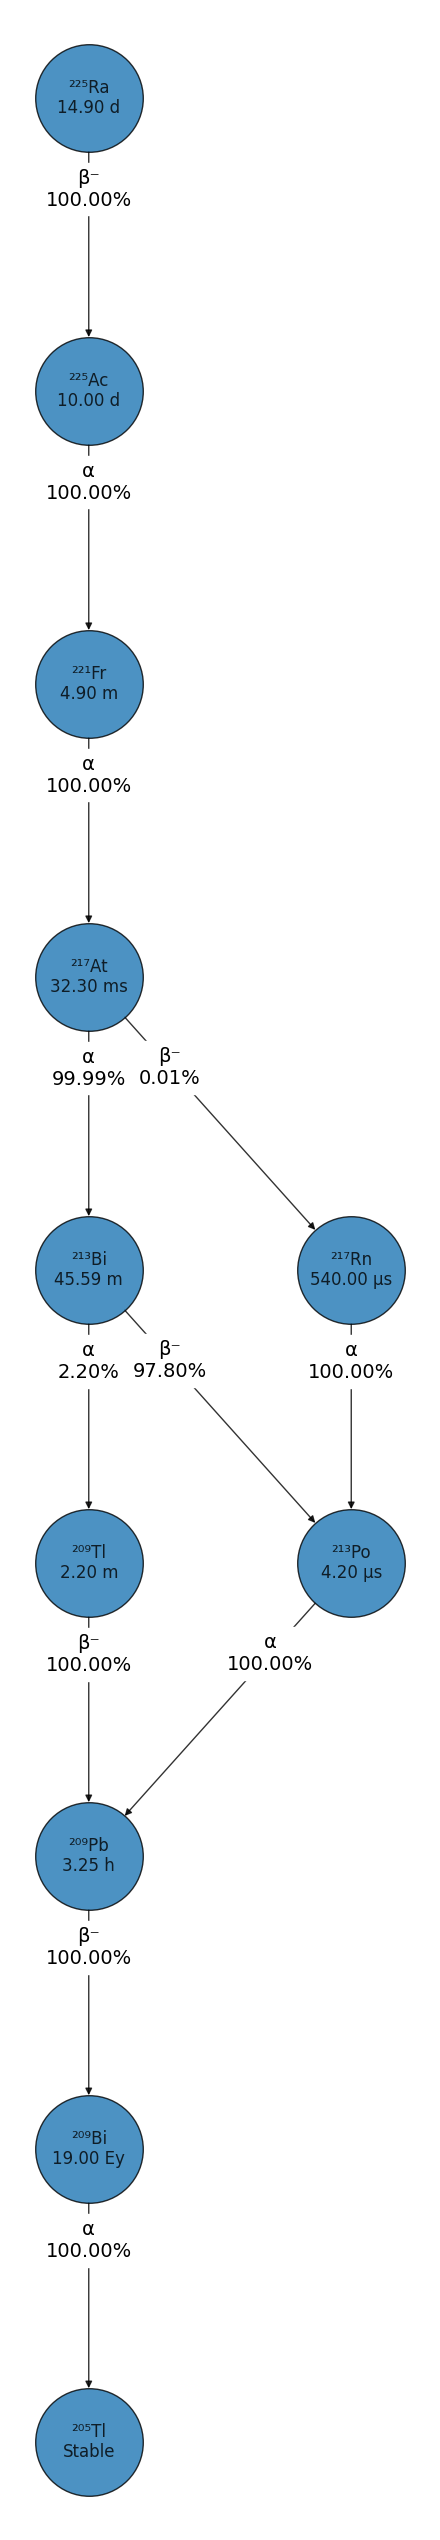

In [4]:
import os
import sys
from pathlib import Path
sys.path.insert(1, str(Path.cwd().resolve().parent))

from nudca.io import load_decay_database
from nudca.plot import DecayDiagram

# nuclide = 'Ac-224'
nuclide = 'Ra225'

decay_database = load_decay_database(data_source='ENDF-B-VIII.1_decay')
decay_diagram = DecayDiagram(decay_database)

fig, axes = decay_diagram.plot_decay_chains(nuclide)
fig.tight_layout()

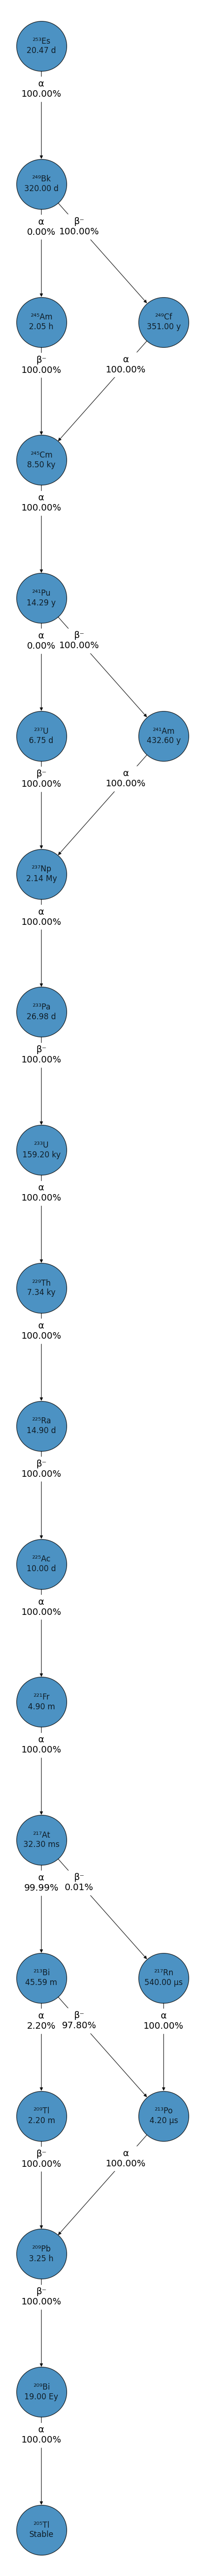

In [2]:

nuclide = 'Es-253'
fig, axes = decay_diagram.plot_decay_chains(nuclide)
fig.tight_layout()

# fig.savefig(Path.cwd().resolve().parent.joinpath(f'plots/figures/DecayChains_{nuclide}.png'), dpi=300)
# fig.savefig('/home/yolo/NutstoreFiles/MYDOC/WEB/NuDCA/static/images/Tutorial/DecayChains_Ni56.png', dpi=150)

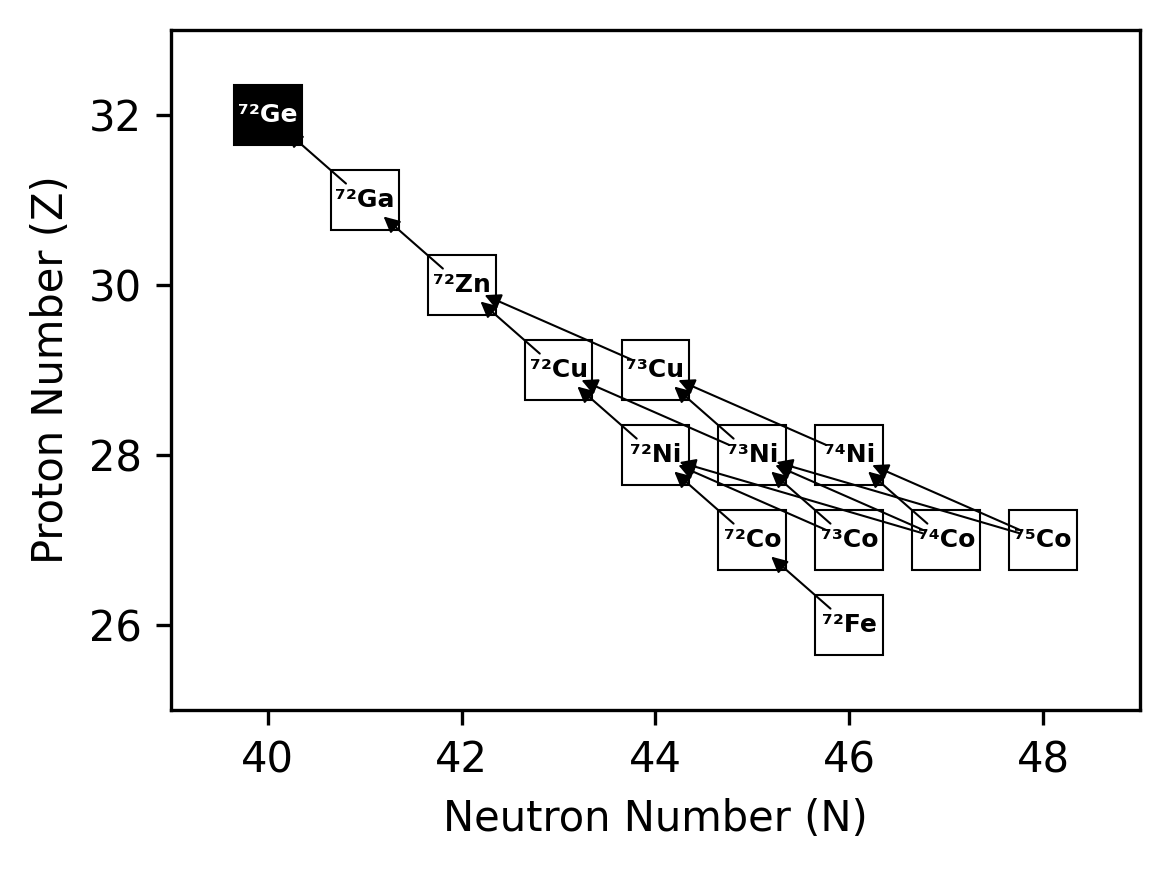

In [1]:


import os
import sys
from pathlib import Path
sys.path.insert(1, str(Path.cwd().resolve().parent))

from nudca.io import load_decay_database
from nudca.plot import DecayDiagram

# nuclide = 'Ac-224'
nuclide = 'Ge-72'

decay_database = load_decay_database(data_source='ENDF-B-VIII.1_decay')
decay_diagram = DecayDiagram(decay_database)
# fig, axes = decay_diagram.plot_rProcess_chains(nuclide)
fig, axes = decay_diagram.plot_chain_nz_chart(nuclide)
fig.tight_layout()
# fig.savefig('/home/yolo/NutstoreFiles/MYDOC/WEB/NuDCA/static/images/Tutorial/ReverseDecayChains_Fe56.png', dpi=500)
fig.savefig(Path.cwd().resolve().parent.joinpath(f'plots/figures/rProcessChains_{nuclide}.png'), dpi=300)

# <center> AbundanceEstimator </center>

In [1]:
import os
import sys
from pathlib import Path
sys.path.insert(1, str(Path.cwd().resolve().parent))

import numpy as np
from nudca.io import load_decay_database, AbundanceEstimator

decay_database = load_decay_database(data_source='ENDF-B-VIII.1_decay')
calculator = AbundanceEstimator(decay_database)

final_abundances = {'Ag109': 1.0e-5}
initial_abundances = calculator.initial_abundances_rProcess(final_abundances)
print(initial_abundances)

{'Ru-109': 4.9999999999999996e-06, 'Pd-109M': 4.9999999999999996e-06}


In [ ]:
# rprocess_chains = calculator.build_rProcess_chains(nuclide)
# chain_contributions = calculator._calculate_chain_contributions(rprocess_chains)
# initial_abundances = calculator.calculate_initial_abundances(rprocess_chains, nuclide, 1.0e-5)

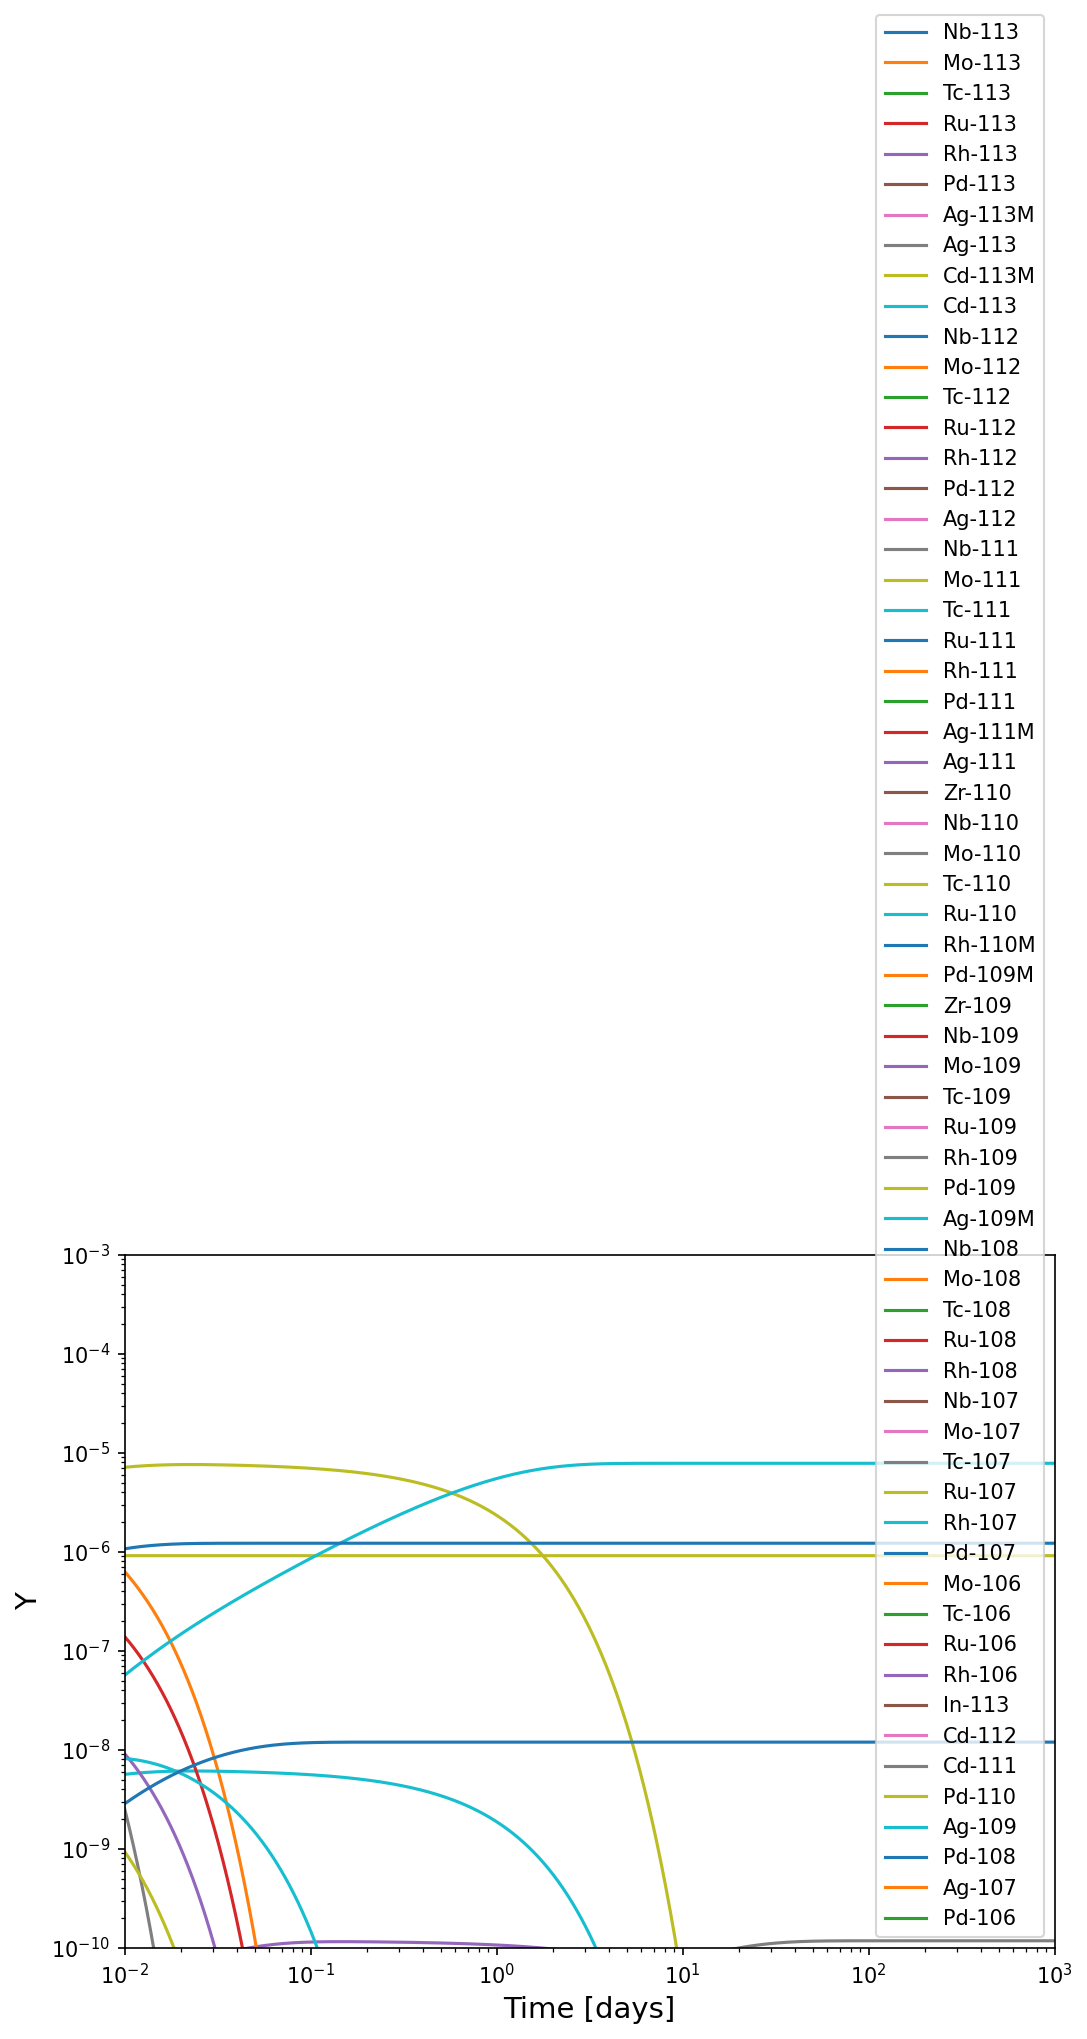

In [1]:
import sys
from pathlib import Path
sys.path.insert(1, str(Path.cwd().resolve().parent))

import numpy as np
import matplotlib.pyplot as plt
from nudca.io import (
    load_decay_database,
    load_decay_matrix,
    AbundanceEstimator,
    )
from nudca.decay_core import RadioactiveDecay

decay_database = load_decay_database(data_source='ENDF-B-VIII.1_decay')
calculator = AbundanceEstimator(decay_database)

final_abundances = {'Ag109': 1.0e-5}
initial_abundances = calculator.initial_abundances_rProcess(final_abundances)

decay_database = load_decay_database(data_source='ENDF-B-VIII.1_decay')
decay_matrix = load_decay_matrix(data_source='ENDF-B-VIII.1_decay')

radioactive_decay = RadioactiveDecay(initial_abundances, decay_database, decay_matrix)

times = np.geomspace(1.e-2, 1.e3, 3000) * 86400
nuclides, Y = radioactive_decay.decay_nuclide_abundances(times)

fig, ax = plt.subplots(figsize=(8, 6), dpi=150)
for i, nuclide in enumerate(nuclides):
    ax.plot(times/86400, Y[:, i], label=f'{nuclide}')

ax.set_xlim(1.e-2, 1.e3)
ax.set_ylim(1e-10, 1e-3)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Time [days]', fontsize=14)
ax.set_ylabel('Y', fontsize=14)

ax.legend()
plt.show()
# fig.savefig('/home/yolo/NutstoreFiles/MYDOC/WEB/NuDCA/static/images/Tutorial/Y_Ni56Decay.png', dpi=300)

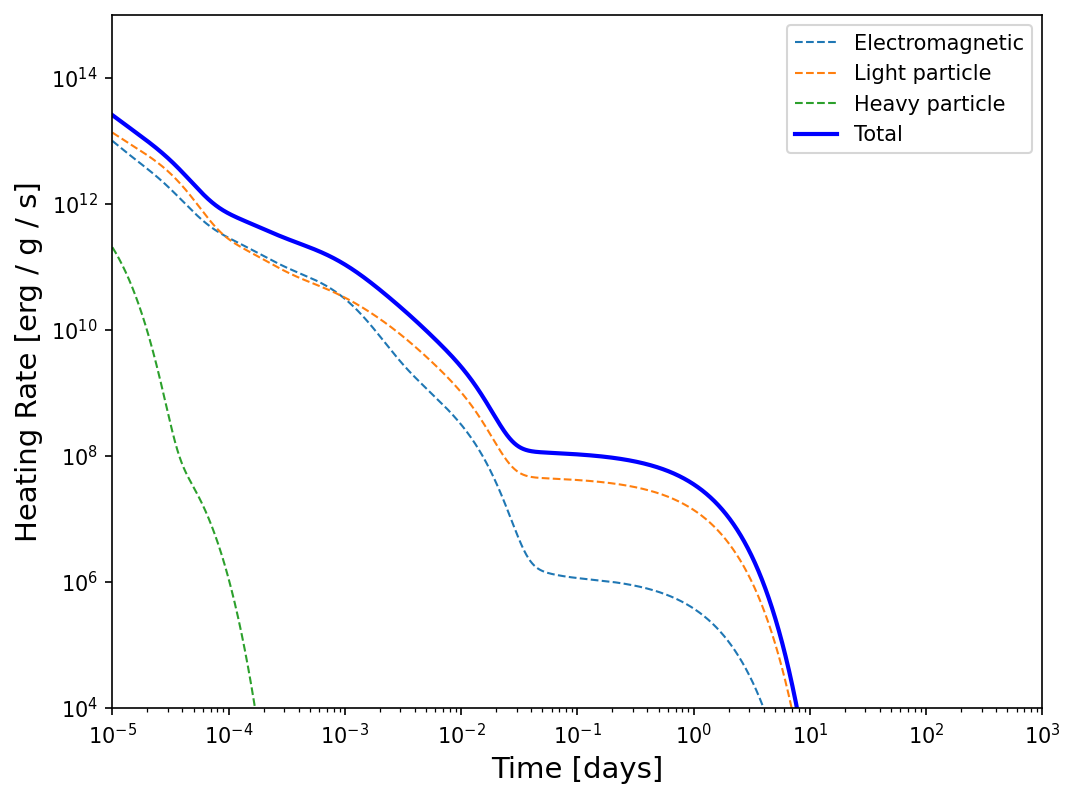

In [1]:
import sys
from pathlib import Path
sys.path.insert(0, str(Path.cwd().resolve().parent))

import numpy as np
import matplotlib.pyplot as plt
from nudca.io import (
    load_decay_database,
    load_decay_matrix,
    AbundanceEstimator,
    )
from nudca.decay_core import RadioactiveDecay

decay_database = load_decay_database(data_source='ENDF-B-VIII.1_decay')
decay_matrix = load_decay_matrix(data_source='ENDF-B-VIII.1_decay')

final_abundances = {'Ag109': 1.0e-5}
calculator = AbundanceEstimator(decay_database)
initial_abundances = calculator.initial_abundances_rProcess(final_abundances)
radioactive_decay = RadioactiveDecay(initial_abundances, decay_database, decay_matrix)

times = np.geomspace(1.e-5, 1.e3, 100000) * 86400
# q_EM = radioactive_decay.decay_heating_rates(times, energy_type='EM')
# q_LP = radioactive_decay.decay_heating_rates(times, energy_type='LP')
# q_HP = radioactive_decay.decay_heating_rates(times, energy_type='HP')
# q = radioactive_decay.decay_heating_rates(times)

q_EM = radioactive_decay.total_decay_heating_rates(times, energy_type='EM')
q_LP = radioactive_decay.total_decay_heating_rates(times, energy_type='LP')
q_HP = radioactive_decay.total_decay_heating_rates(times, energy_type='HP')
q = radioactive_decay.total_decay_heating_rates(times)

fig, ax = plt.subplots(figsize=(8, 6), dpi=150)
ax.plot(times/86400, q_EM, ls='--', lw=1, label='Electromagnetic')
ax.plot(times/86400, q_LP, ls='--', lw=1, label='Light particle')
ax.plot(times/86400, q_HP, ls='--', lw=1,  label='Heavy particle')
ax.plot(times/86400, q, ls='-', lw=2, color='b', label='Total')

ax.set_xlim(1.e-5, 1.e3)
ax.set_ylim(1e4, 1e15)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Time [days]', fontsize=14)
ax.set_ylabel('Heating Rate [erg / g / s]', fontsize=14)

ax.legend()
plt.show()